We have learned from EDA that the target variable (no2_ref) is not evenly distributed but that the dataset is IID. There is also a small amount of missing data in the features (1.6%). It will be neccesary to do a stratified split. 

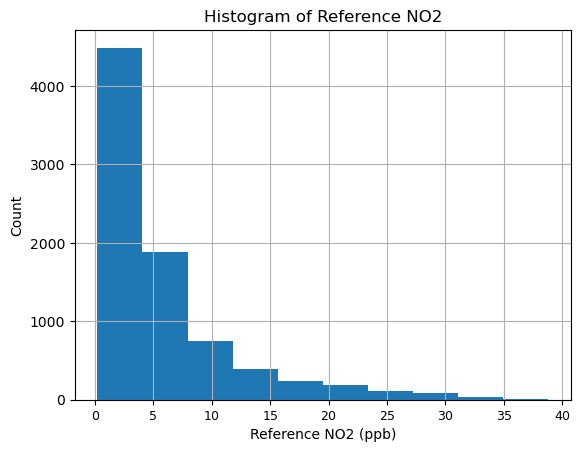

Index(['Unnamed: 0', 'date', 'node_id', 'sensor_name', 'no_wrk_aux',
       'no2_wrk_aux', 'o3_wrk_aux', 'temp', 'rh', 'no2_ref', 't_since_depl'],
      dtype='object')
(8184, 11)


In [1]:
# import dataset

import pandas as pd
import matplotlib
from matplotlib import pylab as plt
import numpy as np

merge_df = pd.read_csv("processed_data_1/merge.csv")

# Recall the histogram of the target variable

merge_df.hist('no2_ref')
plt.xlabel('Reference NO2 (ppb)')
plt.xticks(fontsize=9)
plt.ylabel('Count')
plt.title('Histogram of Reference NO2')
plt.show() 

print(merge_df.columns)
print(merge_df.shape)


In [2]:

print(merge_df.shape)

(8184, 11)


In [2]:
# Create a new column that assigns no2_ref to quintiles to stratify on in train_test_split
from sklearn.model_selection import train_test_split
import pandas as pd

def tts_strat_cont(X, y, train_size, val_size, test_size, random_state):
    
    # Stratify based on y using pd.qcut
    y_bin = pd.qcut(y, q=5)
    print(y_bin.head())

    # First split, stratify on y_bin
    X_train, X_other, y_train, y_other = train_test_split(
        X, y, train_size=train_size, stratify=y_bin, random_state=random_state)

    # Scale the validation size to reflect the remaining data
    val_size_scaled = val_size / (val_size + test_size)

    # Create stratified bins for the second split
    y_bin_other = pd.qcut(y_other, q=5)
    
    # Second split, stratify on y_bin_other
    X_val, X_test, y_val, y_test = train_test_split(
        X_other, y_other, train_size=val_size_scaled, stratify=y_bin_other, random_state=random_state)

    return X_train, y_train, X_val, y_val, X_test, y_test


In [3]:
# Call tts_strat_cont

X = merge_df[['no_wrk_aux','no2_wrk_aux','o3_wrk_aux','temp','rh','t_since_depl']]
y = merge_df['no2_ref']

train_size = 0.6
val_size = 0.2
test_size = 0.2
random_state = 10

# Call function
X_train, y_train, X_val, y_val, X_test, y_test = tts_strat_cont(X, y, train_size, val_size, test_size, random_state)


0     (2.8, 4.6]
1    (4.6, 8.54]
2    (4.6, 8.54]
3    (4.6, 8.54]
4    (4.6, 8.54]
Name: no2_ref, dtype: category
Categories (5, interval[float64, right]): [(0.199, 1.8] < (1.8, 2.8] < (2.8, 4.6] < (4.6, 8.54] < (8.54, 38.8]]


Shape of X train: (4910, 6)
Shape of y train: (4910,)
Shape of X val: (1637, 6)
Shape of y val: (1637,)
Shape of X test: (1637, 6)
Shape of y test: (1637,)
2.1732589635228785


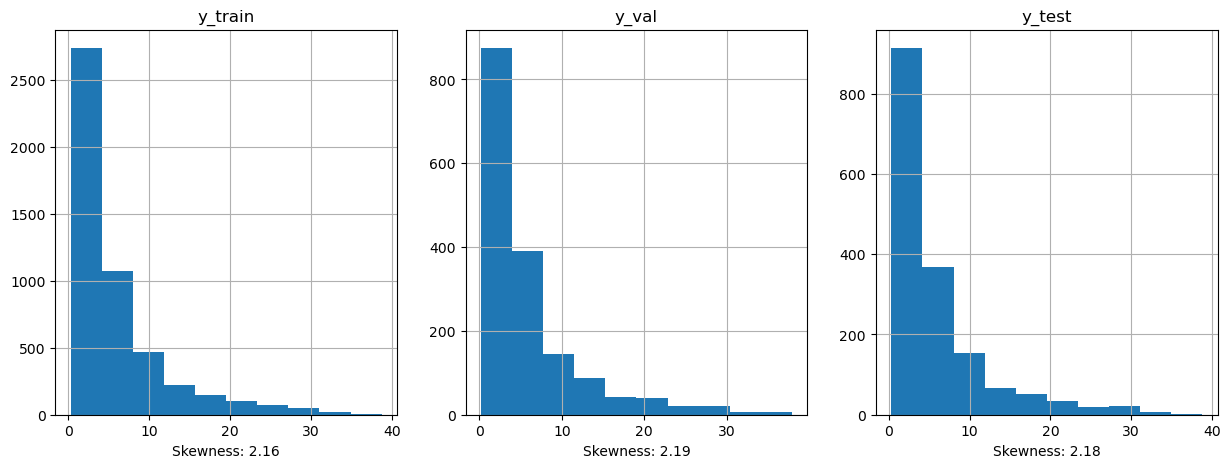

In [4]:
print("Shape of X train:", X_train.shape)
print("Shape of y train:", y_train.shape)
print("Shape of X val:", X_val.shape)
print("Shape of y val:", y_val.shape)
print("Shape of X test:", X_test.shape)
print("Shape of y test:", y_test.shape)

import scipy.stats as stats

#  skewness
skew_train = stats.skew(y_train)
skew_val = stats.skew(y_val)
skew_test = stats.skew(y_test)
skew_orig = stats.skew(y)
print(skew_orig)

# plot the distributions of no2_ref in each of the sets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

y_train.hist(ax=axes[0]) 
axes[0].set_title('y_train')
axes[0].set_xlabel(f'Skewness: {skew_train:.2f}')

y_val.hist(ax=axes[1])  
axes[1].set_title('y_val')
axes[1].set_xlabel(f'Skewness: {skew_val:.2f}')

y_test.hist(ax=axes[2]) 
axes[2].set_title('y_test')
axes[2].set_xlabel(f'Skewness: {skew_test:.2f}')

plt.savefig('EDA_figures/split_distribution.png') 



In [5]:
# Save split datasets

X_train.to_csv("split_data/X_train.csv",index=False)
X_val.to_csv("split_data/X_val.csv",index=False)
X_test.to_csv("split_data/X_test.csv",index=False)

y_train.to_csv("split_data/y_train.csv",index=False)
y_val.to_csv("split_data/y_val.csv",index=False)
y_test.to_csv("split_data/y_test.csv",index=False)


In [9]:
# do stratified k-fold or train_test_split with a stratify term

